In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from pymongo import MongoClient

In [2]:
with open('./secrets/api-keys.json', 'r') as file:
    secrets = json.load(file)

mongo_uri = secrets['MongoDBUrl']

In [3]:
# Connect to MongoDB
client = MongoClient(mongo_uri)
db = client['DRIEMS-Connect']
collection = db['prediction'] #Collection name

df = pd.DataFrame(list(collection.find()))

In [4]:
# Drop the MongoDB-specific fields that are not needed
if '_id' in df:
    df.drop(columns=['_id'], inplace=True)

In [5]:
# Create a new column for Employee Name
df['EmployeeName'] = df['firstName'] + ' ' + df['lastName']

In [6]:
X = df[['TasksCompleted', 'Attendance', 'Feedback', 'LeavesTaken', 'Initiative', 'DeadlinesMet', 'PerformanceScore']]
y = df['EmployeeOfTheMonth'] # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Predicted Employee of the Month (binary):", y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Predicted Employee of the Month (binary): [1 0 0 0]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [7]:
employee_of_the_month_indices = [i for i, x in enumerate(y_pred) if x == 1]
predicted_employee_names = df.iloc[employee_of_the_month_indices]['EmployeeName']

print("Predicted Employee of the Month Names:")
if predicted_employee_names.empty:
    print("No Employee of the Month predicted.")
else:
    for name in predicted_employee_names:
        print(name)

Predicted Employee of the Month Names:
Surajit Mohanty


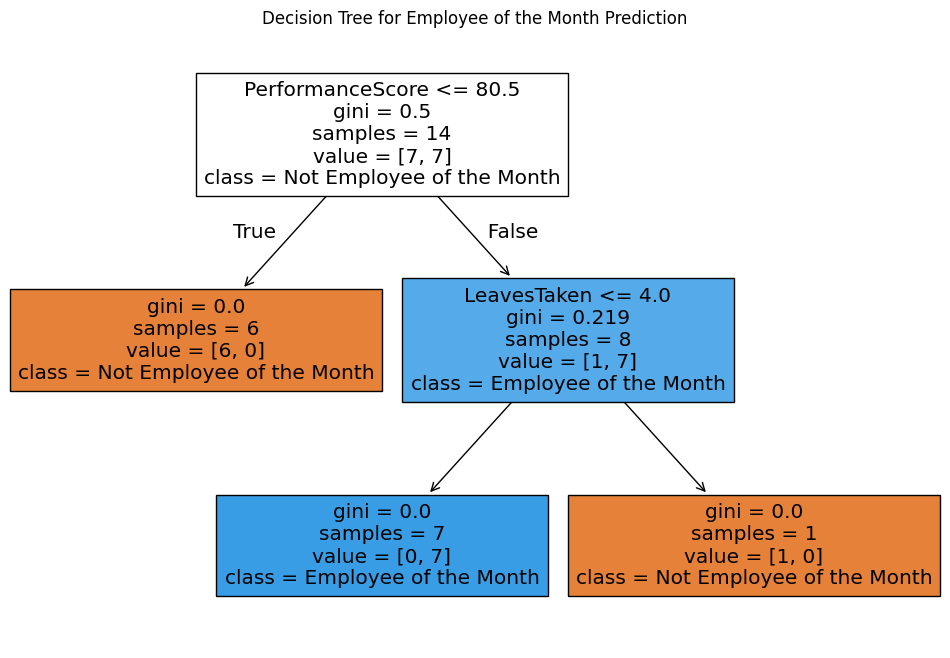

In [8]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Employee of the Month', 'Employee of the Month'], filled=True)
plt.title("Decision Tree for Employee of the Month Prediction")
plt.show()

In [9]:
import joblib

filename = 'employeeOfTheMonth.joblib'

# Save the model to a file
joblib.dump(clf, filename)

print(f"Model saved as {filename}")


Model saved as employeeOfTheMonth.joblib
